# Are 1 in 5 Italians really involved in the gig economy?

## A question from the floor...

At a recent presentation in rome I presented the results form FEPS Digital Footprint study. Part of this study highlight the prevalence of labour in the gig economy in 7 European Countries, the UK, Netherlands, Germany, Sweden, Austria, Switzerland and Italy. One of the responses I got was that the number of Italians that had engaged in paid work in the gig economy was far too high to be credible.  The gross number was roughly 21%, and one of the attendees stood up and asked me “Is this real?”. I recovered quite well, but in hindsight I didn’t defend our research as eloquently as I should have been. No research is perfect, and there are several issues that could bias the data, and I will go over them later. First let me go over the claims though.  The analysis of the Italian data can be found below:


In [103]:
install.packages("Hmisc")
library(tidyverse)
library(ggplot2)
library(Hmisc)
library(reshape2)
Italy <- read.csv(url("https://docs.google.com/spreadsheets/d/e/2PACX-1vS4rEItbjyfB5EIECdy4ZxAhvnk3RCKk_C-yPqRIfkU6MZuGK3n1uem4l_3SpaVAPds_D9N-_lBHlxA/pub?gid=1641105757&single=true&output=csv"))
Austria <- read.csv(url("https://docs.google.com/spreadsheets/d/e/2PACX-1vQeXHa0y7TXgGj51MZEHQ06EGsQqlMMvibxIjDgBGBErR7K78IdUiI0QyN74-u-ZK-xiKPPK44QaXIs/pub?gid=1199263111&single=true&output=csv"))
Germany <- read.csv(url("https://docs.google.com/spreadsheets/d/e/2PACX-1vTf6DA5wtunEJRUyZu9JW-IAEfvrwYdcEb26RWsA8yvi92-AbLPSno7f8V9oGCK2UlSm3dxy2TY8YKI/pub?gid=45076544&single=true&output=csv"))
Netherlands <- read.csv(url("https://docs.google.com/spreadsheets/d/e/2PACX-1vSG4KhoDwlRHXYTBkQxeWrcyfNFACuAlUO2yPMzt1wltbq61OE4sTSUnNpWq4gtXPu66J0Ck6ZxGWwK/pub?gid=64414547&single=true&output=csv"))
Sweden <- read.csv(url("https://docs.google.com/spreadsheets/d/e/2PACX-1vRTL6pnjVYMLfQLPeFCt33kTX1UQbE8D0eqgruEOWKwueraV4E5wyCVN5oB_5ei8b3KQjKY3mFyjydx/pub?gid=1665871730&single=true&output=csv"))
Switzerland <- read.csv(url("https://docs.google.com/spreadsheets/d/e/2PACX-1vQdQo2JJn91my4njXzXZqIMwARC0hzQRVxOFKGHw8Qj3x8wtudrmJ2DXVYjeTvbCwtt2D104U5kINqx/pub?gid=1862985627&single=true&output=csv"))
UK <- read.csv(url("https://docs.google.com/spreadsheets/d/e/2PACX-1vT3Cq-uNkzBWv9xR02dsmYgtnxC4suwyqi7FCRtxevjjZPZqlPvIiW4yEMZ2AI2wjyOpFfOP3yv1ckm/pub?gid=1046723974&single=true&output=csv"))
Seeking <- function(DataSet,IUSE=1){
    SeekingData <- eval(parse(text=DataSet)) %>%
    select(cq03_7,cq03_8,cq03_9) %>%
    mutate(Seeking = pmin(cq03_7,cq03_8,cq03_9)) %>%
    select(Seeking) %>%
    mutate(Seeking = ifelse(Seeking > 8,8, Seeking))
    Seeker <- SeekingData$Seeking
    SeekingSums <- c(sum(Seeker == 8),sum(Seeker < 8),sum(Seeker < 7),sum(Seeker <5),sum(Seeker <4),sum(Seeker <2))
    SeekingSums <- (SeekingSums/length(Seeker))*IUSE
    SeekingSums <- round(SeekingSums,3)
    SeekingSums <- SeekingSums*100
    #SeekingSums <- rbind(c("Not at all", "At least Yearly","At least 6-monthly","At least Monthly",
    #                       "At least Weekly","At least Daily"),
    #                     SeekingSums)
    return(SeekingSums)
}


Finding <- function(DataSet,IUSE=1){
    if(DataSet == "Italy"|DataSet == "Switzerland"){
    SeekingData <- eval(parse(text=DataSet)) %>%
    select(cq04_1,cq04_2,cq04_3) %>%
    replace_na(list(cq04_1=9,cq04_2=9,cq04_3=9)) %>%
    mutate(Seeking = pmin(cq04_1,cq04_2,cq04_3)) %>%
    select(Seeking) %>%
    mutate(Seeking = ifelse(Seeking > 8,8, Seeking))
    Seeker <- SeekingData$Seeking
    DataLength <- eval(parse(text=DataSet))$serialno
    SeekingSums <- c(sum(Seeker == 8),sum(Seeker < 8),sum(Seeker < 7),sum(Seeker <5),sum(Seeker <4),sum(Seeker <2))
    SeekingSums[1] <- length(DataLength)-SeekingSums[2]
    SeekingSums <- (SeekingSums/length(DataLength))*IUSE
    SeekingSums <- round(SeekingSums,3)
    SeekingSums <- SeekingSums*100
    #SeekingSums <- rbind(c("Not at all", "At least Yearly","At least 6-monthly","At least Monthly",
    #                       "At least Weekly","At least Daily"),
    #                     SeekingSums)
    return(SeekingSums)} else {
    SeekingData <- eval(parse(text=DataSet)) %>%
    select(cq04) %>%
    replace_na(list(cq04=9)) %>%
    mutate(Seeking = cq04) %>%
    select(Seeking) %>%
    mutate(Seeking = ifelse(Seeking > 8,8, Seeking))
    Seeker <- SeekingData$Seeking
    DataLength <- eval(parse(text=DataSet))$serialno
    SeekingSums <- c(sum(Seeker == 8),sum(Seeker < 8),sum(Seeker < 7),sum(Seeker <5),sum(Seeker <4),sum(Seeker <2))
    SeekingSums[1] <- length(DataLength)-SeekingSums[2]
    SeekingSums <- (SeekingSums/length(DataLength))*IUSE
    SeekingSums <- round(SeekingSums,3)
    SeekingSums <- SeekingSums*100 
        return(SeekingSums)}
}

Income <- function(DataSet){
     SeekingData <- eval(parse(text=DataSet)) %>%
    select(cq06) %>%
    replace_na(list(cq06 = 0))%>%
    mutate(cq06 = ifelse(cq06>6,0,cq06))
    DataLength <- eval(parse(text=DataSet))$serialno
    Seeker <- SeekingData$cq06
    SeekingSums <-c(sum(Seeker == 0),sum(Seeker >=1),sum(Seeker >=2),sum(Seeker >=3),sum(Seeker >=4),
                    sum(Seeker >=5),sum(Seeker >=6))
    SeekingSums <- SeekingSums/length(DataLength)
    SeekingSums <- round(SeekingSums,3)
    SeekingSums <- SeekingSums*100
    return(SeekingSums)
    
    
}
FrequencyList <- c(" 1 Not at all", "2 At least Yearly","3 At least 6-monthly","4 At least Monthly",
                           "5 At least Weekly","6 At least Daily")

IncomeList <- c("1 No Income", "2 Any Income", "3 At least 10%","4 At least 25%","5 At least 50%","6 At least 75%",
               "7 All income")

SeekingTable<-data.frame(rbind(Seeking("Italy"),Seeking("Switzerland"),Seeking("Austria"),Seeking("Germany"),
                               Seeking("Netherlands"), Seeking("Sweden"), Seeking("UK")))
colnames(SeekingTable)<- FrequencyList

rownames(SeekingTable)<-c("Italy","Switzerland","Austria","Germany","Netherlands","Sweden","UK")



Warning message:
"package 'Hmisc' is in use and will not be installed"

## A picture of Italy.

Italy is a country place with 60-odd million people, but our snapshot of Italy is made up of a weighted sample of 2200 people.  We hope that this sample is representative of the Italian population in general, and will get to that in a second.

For now however, let’s focus on the questions and the answers that these 2200 people gave.

### Looking for work:

The first question is related to whether or not a person LOOKS for gig work. This is done by a set of questions. These questions are labelled cq03_7-9 and ask how often someone...

* Look for work you can carry out from your own home on a website such as Upwork, Freelancer, Addlance, Elance, Odesk or PeoplePerHour
* Look for work you can carry out for different customers somewhere outside your home on a website such as Taskrabbit, Myhammer, Semplifiko, Helpling or SOSartigiani
* Offer to drive someone to a location for a fee using an app or website such as Uber or Blablacar

Since we are, at the moment only interested if somebody does ANY of these things, we look for the one type of work (if any) they look for the most often, and use that as our measure of how often they look for gig work online. 

Here are the percentages of people in our dataset looking for work using one of the three methods (please note that I have not applied weighting yet, but I will be getting to that later:



In [104]:
print("People Seeking Crowdwork")
SeekingTable[1,]


[1] "People Seeking Crowdwork"


,1 Not at all,2 At least Yearly,3 At least 6-monthly,4 At least Monthly,5 At least Weekly,6 At least Daily
Italy,71.1,28.9,26.1,19.6,14.6,5.1


This is quite a large number! It suggests that almost a third of Italians look for this sort of work at least once a year. In fact, the larger number of 6-monthly and Monthly job searchers seem very large.

### Now that we found work, what are we gonna do?

The actual number of people who FIND work is somewhat smaller.  The amount of work that they find can be defined in two ways: The frequency of work (how often they engage in paid work), and the proportion of their total income that they get from this work. 

We get this information as well from the spreadsheet.
#### Frequency

The questions asked in cq04 give us the frequency. After recoding a bit to take into account missing data we end up with the following frequencies:



In [105]:
print("Percentages of Italians finding work in our sample")
rbind(FrequencyList,Finding(DataSet = "Italy"))

[1] "Percentages of Italians finding work in our sample"


FrequencyList,1 Not at all,2 At least Yearly,3 At least 6-monthly,4 At least Monthly,5 At least Weekly,6 At least Daily
,78.4,21.6,19.2,13.6,10.3,3


This is quite similar, roughly 1 in 5 engage in this sort of work at least once every 6 months, and 10% on a weekly basis. A small minority of 3% do it every day!

#### Income

The question asked in cq06 is regarding the proportion of total income that italians reported they derived from income. We see that 82% report no income at all (This includes people who didn’t know, or refused to answer). For roughly 20 percent is at least under 10 percent, but we see that roughly 5 percent of the italian sample state  that rely on this sort of work for at least 50 percent of their income. 




In [106]:
print("Reported proportion of Income from crowdwork")
rbind(IncomeList,Income("Italy"))

[1] "Reported proportion of Income from crowdwork"


IncomeList,1 No Income,2 Any Income,3 At least 10%,4 At least 25%,5 At least 50%,6 At least 75%,7 All income
,82.4,17.6,11.2,7.8,5.5,3.4,1.9


## So what is wrong with this picture?

At first glance, nothing. It is a survey performed by a well-reputed provider, on whose work a lot of decisions are made (in Italy as well). However, the numbers seem very large (when compared to a lot of other estimates). Because of this, it is a good idea to investigate competing explanations for this result.  Some of these possible explanations are given below: 

1. Lost in translation
1. Sampling Bias (Online vs Offline)
1. Errors in the Survey
1. Deception
1. Other...

### Lost in translation?

Are there any specific language issues that may have cropped up? Perhaps, after all making sure that the contents of a survey mean the same things to respondents across 7 countries and 6 languages is quite a daunting task. Luckily we had the aid of both our suvey-provider as well as our local partner in ensuring that the content was meaningful for the particular country. However, if we are to use Switzerland (Because it uses German and **ITALIAN**) as an example, we can then investigate to see:





In [107]:
CompareITCHSeek<-rbind(FrequencyList,Seeking("Italy"),Seeking("Switzerland"))
rownames(CompareITCHSeek)<-c("Frequency","Italy","Switzerland")
print("Seeking Crowdwork")
CompareITCHSeek

CompareITCHFind<-rbind(FrequencyList,Finding("Italy"),Finding("Switzerland"))
rownames(CompareITCHFind)<-c("Frequency","Italy","Switzerland")
print("Finding Crowdwork")
CompareITCHFind


CompareITCHInc<-rbind(IncomeList,Income("Italy"),Income("Switzerland"))
rownames(CompareITCHInc)<-c("Frequency","Italy","Switzerland")
print("Income from Crowdwork")
CompareITCHInc


[1] "Seeking Crowdwork"


Frequency,1 Not at all,2 At least Yearly,3 At least 6-monthly,4 At least Monthly,5 At least Weekly,6 At least Daily
Italy,71.1,28.9,26.1,19.6,14.6,5.1
Switzerland,72.9,27.1,23.7,16.3,10.9,3


[1] "Finding Crowdwork"


Frequency,1 Not at all,2 At least Yearly,3 At least 6-monthly,4 At least Monthly,5 At least Weekly,6 At least Daily
Italy,78.4,21.6,19.2,13.6,10.3,3
Switzerland,83.7,16.3,14.4,9,6.4,1.8


[1] "Income from Crowdwork"


Frequency,1 No Income,2 Any Income,3 At least 10%,4 At least 25%,5 At least 50%,6 At least 75%,7 All income
Italy,82.4,17.6,11.2,7.8,5.5,3.4,1.9
Switzerland,86,14,7.2,4.7,3.4,2.5,1.6


The data is, in fact quite similar between the two countries when looking at seeking crowdwork.

In terms of how often they actually find work, however, Italians are somewhat more likely to find such work more often than the Swiss we surveyed. However, it is interesting to note that they were still not wildly different from each other. 

In terms of proportions of earings, we again see that the Italian sample is somewhat more likely to earn a larger proportion of their income from platform economy labour more than their swiss  counterparts.
Again, however, it is important to note that these are still in the same sort of ballpark, though.

#### What about the German Speakers?

However, it could be that the issue that exists in the Italian translation also exists in the German translation that the Swiss sample had the option of responding to. Luckily, the survey was also performed in Austria and Germany 

In [108]:

CompareITCHATDESeek<-rbind(FrequencyList,Seeking("Italy"),Seeking("Switzerland"),Seeking("Austria"),Seeking("Germany"))
rownames(CompareITCHATDESeek)<-c("Frequency","Italy","Switzerland","Austria","Germany")
print("Seeking Crowdwork")
CompareITCHATDESeek

CompareITCHATDEFInd<-rbind(FrequencyList,Finding("Italy"),Finding("Switzerland"), Finding("Austria"), Finding("Germany"))
rownames(CompareITCHATDEFInd)<-c("Frequency","Italy","Switzerland","Austria","Germany")
print("Finding Crowdwork")
CompareITCHATDEFInd

CompareITCHATDEInc<-rbind(IncomeList,Income("Italy"),Income("Switzerland"), Income("Austria"),Income("Germany"))
rownames(CompareITCHATDEInc)<-c("Frequency","Italy","Switzerland","Austria","Germany")
print("Income from Crowdwork")
CompareITCHATDEInc

[1] "Seeking Crowdwork"


Frequency,1 Not at all,2 At least Yearly,3 At least 6-monthly,4 At least Monthly,5 At least Weekly,6 At least Daily
Italy,71.1,28.9,26.1,19.6,14.6,5.1
Switzerland,72.9,27.1,23.7,16.3,10.9,3
Austria,69.6,30.4,26.4,17.7,11.5,2.7
Germany,82.1,17.9,15.7,10,5.9,0.8


[1] "Finding Crowdwork"


Frequency,1 Not at all,2 At least Yearly,3 At least 6-monthly,4 At least Monthly,5 At least Weekly,6 At least Daily
Italy,78.4,21.6,19.2,13.6,10.3,3
Switzerland,83.7,16.3,14.4,9,6.4,1.8
Austria,82.3,17.7,15.3,8.9,5.1,1.2
Germany,88,12,10.2,6.3,4.4,0.9


[1] "Income from Crowdwork"


Frequency,1 No Income,2 Any Income,3 At least 10%,4 At least 25%,5 At least 50%,6 At least 75%,7 All income
Italy,82.4,17.6,11.2,7.8,5.5,3.4,1.9
Switzerland,86,14,7.2,4.7,3.4,2.5,1.6
Austria,84.2,15.8,6.9,4.4,2.4,1.5,0.6
Germany,88.7,11.3,6.5,4.4,2.9,1.2,0.4


Here we see that Italy is not that different from Switzerland or Austria at all. They have comparable numbers in terms of people searching and finding crowdwork, although the Italian sample *does* have a slightly higher proportion of crowdworkers, but this difference is not one that is particularly dramatic. However, in terms of *frequency* of performing these sorts of jobs, Italy's numbers are still quite high. However, it would be difficult to notch these differences down to language issues, as you would then expect these 4 countries to be more similar than they are. 

### Sampling Bias

One criticism that can be levelled against these numbers is, of course, that it is an **online-only** sample answering questions regarding their interactions with  **online platforms**. One could then reasonably make the case that this is a function of the relative internet penetration of the countries. Below is data on the relative internet penetration in **all** the countries in the survey.


In [109]:
InternetUseTable <- data.frame(c("Italy","Switzerland","Austria","Germany","UK","Sweden","Netherlands"),c(.69,.90,.84,.90,.95,.93,.93))
colnames(InternetUseTable) <- c("Country", "Internet Use")
InternetUseTable

Country,Internet Use
Italy,0.69
Switzerland,0.90
Austria,0.84
Germany,0.90
UK,0.95
Sweden,0.93
Netherlands,0.93


This table suggests that there are noticeable differences between the 7 countries. If the differences between the country can, to some extent be explained by differences in the relative size of the internet-using portion of the opulation in these countries, this suggests that there may be an inherent sampling bias in using an online panel, that the bias-reducing procedures of these samples cannot mitigate. Now, do be aware that this approach is not completely accurate, as the different demographic segments, making up the online panels, would have slightly different rates of internet use, but this is a start.

## Crowdwork by Country - Controlling for Internet Use

In [110]:
#CompareNLUKSEDESeek<-rbind(FrequencyList,Seeking("Netherlands"),Seeking("UK"),Seeking("Sweden"),Seeking("Germany"))
#rownames(CompareNLUKSEDESeek)<-c("Frequency","Netherlands","UK","Sweden","Germany")
#print("Seeking Crowdwork")
#CompareNLUKSEDESeek




#CompareNLUKSEDEFind<-rbind(FrequencyList,Finding("Netherlands"),Finding("UK"),Finding("Sweden"),Finding("Germany"))
#rownames(CompareNLUKSEDEFind)<-c("Frequency","Netherlands","UK","Sweden","Germany")
#print("Finding Crowdwork")
#CompareNLUKSEDEFind

In [111]:
CompareAll <- rbind(FrequencyList,Seeking("Italy"),
                   Seeking("Switzerland"),
                   Seeking("Austria"),
                   Seeking("Germany"),
                   Seeking("UK"),
                    Seeking("Sweden"),
                    Seeking("Netherlands"))
rownames(CompareAll) <- c("Frequency","Italy","Switzerland","Austria","Germany","UK","Sweden","Netherland")

CompareAllInternet <- rbind(FrequencyList,Seeking("Italy",.69),
                   Seeking("Switzerland",.90),
                   Seeking("Austria",.85),
                   Seeking("Germany",.90),
                   Seeking("UK",.95),
                    Seeking("Sweden",.93),
                    Seeking("Netherlands",.93))
rownames(CompareAll) <- c("Frequency","Italy","Switzerland","Austria","Germany","UK","Sweden","Netherland")
CompareAllFind <- rbind(FrequencyList, Finding("Italy"),
                       Finding("Switzerland"),
                   Finding("Austria"),
                   Finding("Germany"),
                   Finding("UK"),
                    Finding("Sweden"),
                    Finding("Netherlands"))
rownames(CompareAllFind) <- c("Frequency","Italy","Switzerland","Austria","Germany","UK","Sweden","Netherland")

CompareAllFindInternet <- rbind(FrequencyList, Finding("Italy",.69),
                       Finding("Switzerland",.90),
                   Finding("Austria",.85),
                   Finding("Germany",.90),
                   Finding("UK",.95),
                    Finding("Sweden",.93),
                    Finding("Netherlands",.93))
rownames(CompareAllFindInternet) <- c("Frequency","Italy","Switzerland","Austria","Germany","UK","Sweden","Netherland")

print("Seeking Crowdwork")
CompareAll[,-1]

print("Seeking Crowdwork controlled by Internet Usage")
CompareAllInternet[,-1]
                        
print("Finding Crowdwork")                                       
CompareAllFind[,-1]

print("Finding Crowdwork controlled by Internet Usage")   
CompareAllFindInternet[,-1]

[1] "Seeking Crowdwork"


Frequency,2 At least Yearly,3 At least 6-monthly,4 At least Monthly,5 At least Weekly,6 At least Daily
Italy,28.9,26.1,19.6,14.6,5.1
Switzerland,27.1,23.7,16.3,10.9,3
Austria,30.4,26.4,17.7,11.5,2.7
Germany,17.9,15.7,10,5.9,0.8
UK,16.9,15.5,10.2,6.8,2.3
Sweden,18,16.2,12,7.5,2.4
Netherland,12.1,10.1,6.5,4.5,0.8


[1] "Seeking Crowdwork controlled by Internet Usage"


FrequencyList,2 At least Yearly,3 At least 6-monthly,4 At least Monthly,5 At least Weekly,6 At least Daily
,19.9,18,13.5,10.1,3.5
,24.4,21.3,14.7,9.9,2.7
,25.8,22.4,15.1,9.8,2.3
,16.1,14.1,9,5.3,0.7
,16,14.8,9.7,6.5,2.2
,16.8,15,11.2,7,2.2
,11.3,9.4,6.1,4.2,0.7


[1] "Finding Crowdwork"


Frequency,2 At least Yearly,3 At least 6-monthly,4 At least Monthly,5 At least Weekly,6 At least Daily
Italy,21.6,19.2,13.6,10.3,3
Switzerland,16.3,14.4,9,6.4,1.8
Austria,17.7,15.3,8.9,5.1,1.2
Germany,12,10.2,6.3,4.4,0.9
UK,7.6,6.5,4.2,2.7,0.6
Sweden,7.6,6.8,3.9,2.4,0.5
Netherland,9,7.9,4.7,2.9,0.4


[1] "Finding Crowdwork controlled by Internet Usage"


Frequency,2 At least Yearly,3 At least 6-monthly,4 At least Monthly,5 At least Weekly,6 At least Daily
Italy,14.9,13.3,9.4,7.1,2.1
Switzerland,14.7,13,8.1,5.8,1.6
Austria,15.1,13,7.6,4.4,1
Germany,10.8,9.2,5.7,3.9,0.8
UK,7.2,6.2,4,2.5,0.6
Sweden,7.1,6.3,3.6,2.2,0.4
Netherland,8.4,7.3,4.3,2.7,0.4


In [120]:
TestFigure <-data.frame(CompareAllFind[-1,c(2)],stringsAsFactors = F)
colnames(TestFigure )<- c("Yearly")

TestFigure$Country <- rownames(TestFigure)
TestFigure$Internet_Controlled <- CompareAllFindInternet[-1,c(2)]

TestFigure <- melt(TestFigure, id.vars=c("Country"))
#TestFigure <- melt(TestFigure,id.vars="Country")
colnames(TestFigure) <- c("Country","Control","Percentage_Yearly")

TestFigure$Percentage_Yearly <- as.numeric(TestFigure$Percentage_Yearly)



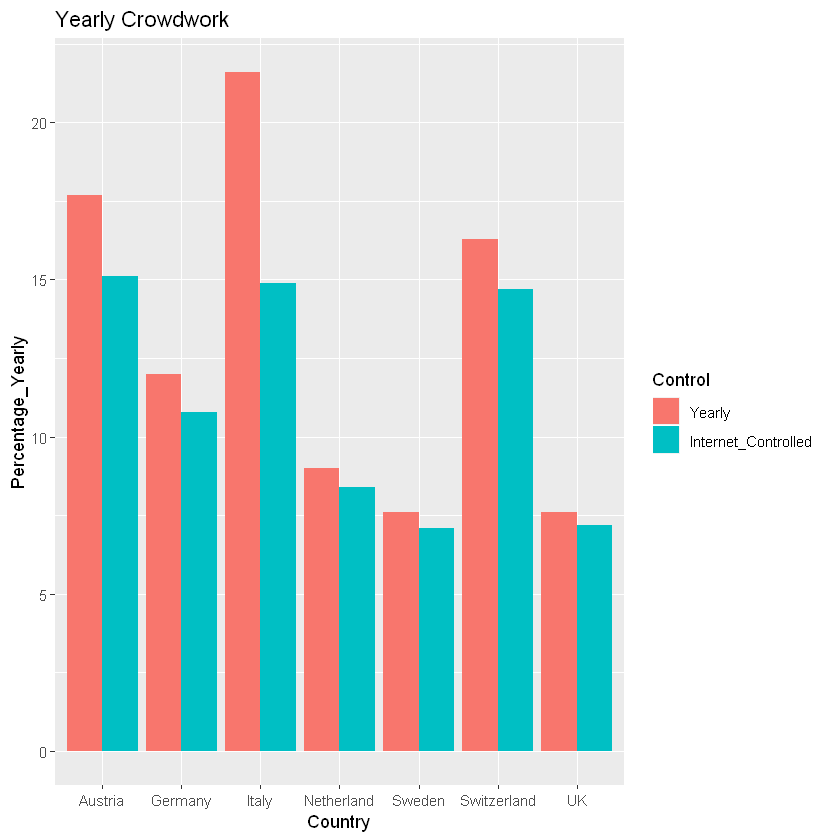

In [122]:
ggplot(data = TestFigure,aes(y=Percentage_Yearly,x=Country,fill=Control))+
geom_bar(stat='identity',position=position_dodge(.9))+
ggtitle(label = "Yearly Crowdwork")

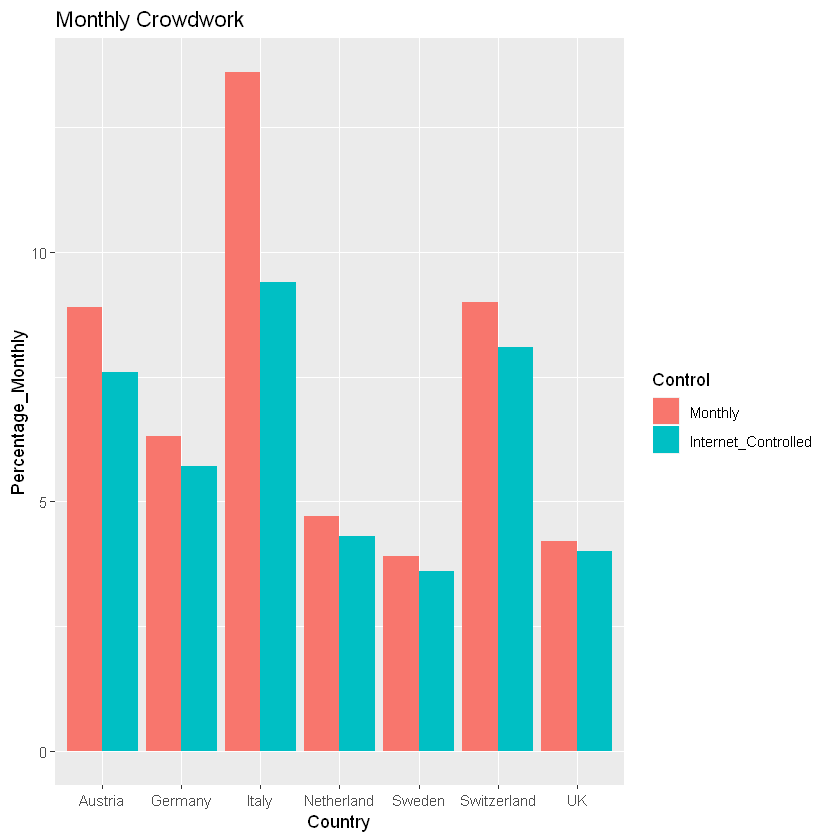

In [127]:
TestFigure <-data.frame(CompareAllFind[-1,c(4)],stringsAsFactors = F)
colnames(TestFigure )<- c("Monthly")
#TestFigure
TestFigure$Country <- rownames(TestFigure)
TestFigure$Internet_Controlled <- CompareAllFindInternet[-1,c(4)]

TestFigure <- melt(TestFigure, id.vars=c("Country"))
#TestFigure <- melt(TestFigure,id.vars="Country")
colnames(TestFigure) <- c("Country","Control","Percentage_Monthly")

TestFigure$Percentage_Monthly <- as.numeric(TestFigure$Percentage_Monthly)

ggplot(data = TestFigure,aes(y=Percentage_Monthly,x=Country,fill=Control))+
geom_bar(stat='identity',position=position_dodge(.9))+
ggtitle(label = "Monthly Crowdwork")

This suggests that some of the differences between Italy and the other countries in the study, in particular *Switzerland* can be explained as a function of the differences in internet access between this countries. 